In [2]:
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [7]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [9]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

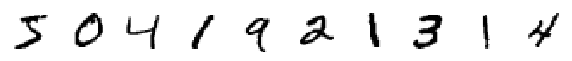

In [10]:
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

In [11]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

INFO:plaidml:Opening device "opencl_amd_baffin.0"


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 53s 1ms/step - loss: 0.2057 - acc: 0.9350 - val_loss: 0.0603 - val_acc: 0.9837
Epoch 2/5
50000/50000 [==============================] - 26s 530us/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0433 - val_acc: 0.9886
Epoch 3/5
50000/50000 [==============================] - 27s 536us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0438 - val_acc: 0.9874
Epoch 4/5
50000/50000 [==============================] - 27s 535us/step - loss: 0.0280 - acc: 0.9916 - val_loss: 0.0388 - val_acc: 0.9903
Epoch 5/5
50000/50000 [==============================] - 27s 537us/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0386 - val_acc: 0.9888


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 7s 694us/step
Accuracy: 0.9913
Loss:  0.02857306361794472


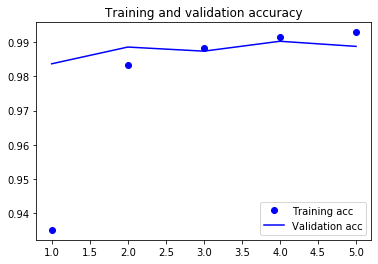

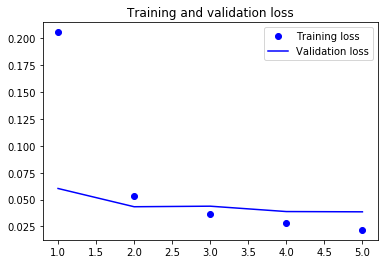

In [17]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

In [18]:
preds = model.predict(test_images)

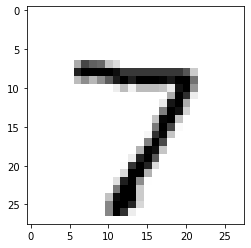

In [19]:
(_, _), (test_images, _) = mnist.load_data()

plt.imshow(test_images[0], cmap=plt.cm.binary)

In [20]:
print(preds[0])

[3.0247862e-12 1.8215304e-10 3.2729400e-08 9.5694306e-09 1.1007739e-11
 8.3675263e-12 4.9331286e-18 1.0000000e+00 1.2366239e-11 1.2163263e-08]


In [21]:
np.argmax(preds[0])

7